<a href="https://colab.research.google.com/github/ToffeeTofu/AI-Assignments/blob/main/LogisticRegressionCodingProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# ================================
# Logistic Regression (from scratch) — Skeleton
# Rubrics:
# - Multiple Features(10+)
# - 2 classes(binary classification)
# - 5000 + rows
# 80% train, 20% test
# ================================

# 0) Imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random


# 1) Load / prepare data
# --------------------------------------------------
# Assumptions (edit as needed):
#   - Binary classification with labels in {0,1}
#   - X is an (m, n) feature matrix (no bias column yet)
#   - y is an (m,) label vector

# Read CSV
data = pd.read_csv('Invistico_Airline.csv')

#data.isna().sum()


Iteration    0: Cost = 0.6931
Iteration  100: Cost = 0.5762
Iteration  200: Cost = 0.5304
Iteration  300: Cost = 0.5079
Iteration  400: Cost = 0.4950
Iteration  500: Cost = 0.4868
Iteration  600: Cost = 0.4811
Iteration  700: Cost = 0.4770
Iteration  800: Cost = 0.4739
Iteration  900: Cost = 0.4715
Final parameters (w):
[ 0.18274685  0.14129618 -0.02375986  0.19265543 -0.15967478 -0.04172319
 -0.03078424  0.09574321  0.87739537  0.48324195  0.34427834  0.23664804
 -0.11189591]


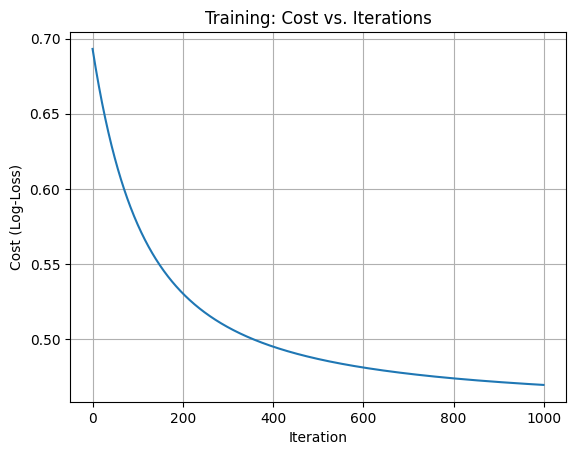

Plotting cost sensitivity for parameter indices: [ 8  9 10]


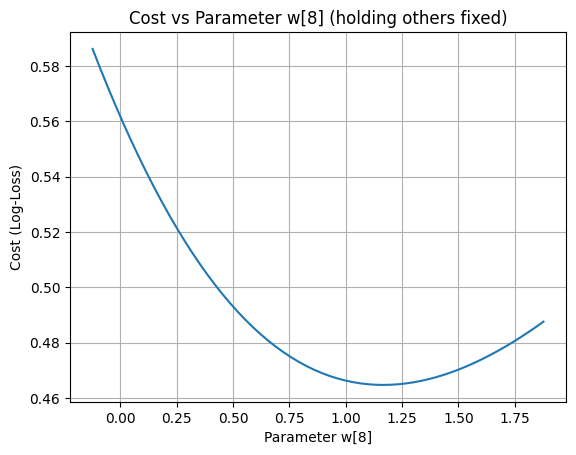

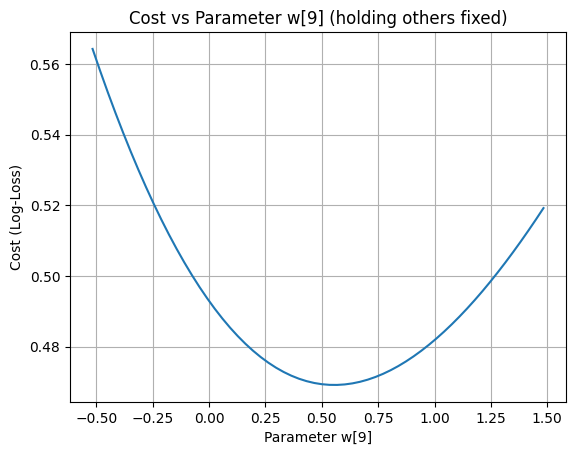

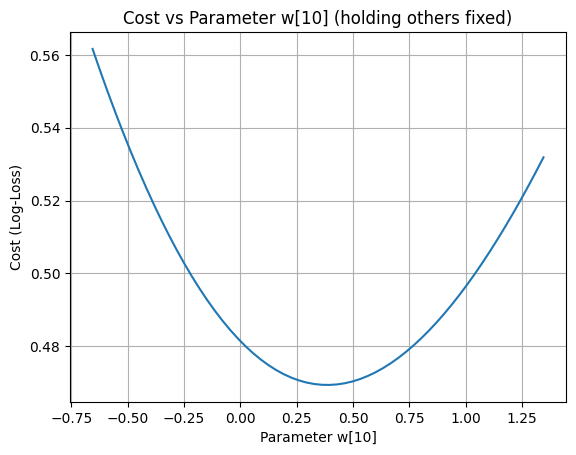


Test Accuracy: 79.69%


In [15]:
# Separate features and target
X = data[['Age','Flight Distance','Seat comfort','Departure/Arrival time convenient','Food and drink','Gate location','Inflight wifi service','Inflight entertainment','Ease of Online booking','Leg room service','Cleanliness','Departure Delay in Minutes']]
y = data['satisfaction']

# Scales all data besides the bias column
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Gets the number of rows(aka number of data points)
m_train = X_train.shape[0]
m_test = X_test.shape[0]

# Add bias column (x0 = 1)
X = np.column_stack([np.ones(m_train), X_train])  # shape: (m, n+1)
#X_test = np.column_stack([np.ones(m_test), X_test])  # shape: (m, n+1)

# Gets the number of columns(aka number of features)
n_with_bias = X.shape[1]


# 2) Utility functions: sigmoid, loss, gradient, prediction
# --------------------------------------------------
def sigmoid(z):
    # Complete the sigmoid function
    z = np.clip(z, -500, 500)
    return 1/(1 + np.exp(-z))

def predict_proba(X, w):
    # Complete the predict probability function
    return sigmoid(np.dot(X, w))

def binary_cross_entropy(y_true, y_prob, eps=1e-12):
    # Complete the binary cross entropy function
    y_prob = np.clip(y_prob, eps, 1 - eps)
    return -np.mean(y_true * np.log(y_prob) + (1 - y_true) * np.log(1 - y_prob))

def gradient(X, y_true, y_prob):
    # Complete the gradient descent function
    m = X.shape[0]
    return (1/m) * np.dot(X.T, (y_prob - y_true))


# 3) Initialize parameters
# --------------------------------------------------
# Set the initial values for the parameters to 0
w = np.zeros(n_with_bias)

# 4) Hyperparameters
# --------------------------------------------------
# Set step size for gradient descent
learning_rate = 0.01

# number of passes over the data
num_iterations = 1000

# For tracking cost at each iteration
cost_history = []


# 5) Gradient Descent loop
# --------------------------------------------------
for i in range(num_iterations):
    # Forward pass: compute probabilities
    y_prob = predict_proba(X, w)

    # Computer loss
    cost = binary_cross_entropy(y_train, y_prob)
    cost_history.append(cost)

    # Compute gradient
    grad = gradient(X, y_train, y_prob)

    #Update parameters
    w -= learning_rate * grad

    if i % 100 == 0:
        print(f"Iteration {i:4d}: Cost = {cost:.4f}")


# 6) Final parameters
# --------------------------------------------------
print("Final parameters (w):")
print(w)  # w[0] is bias term


# 7) Plot: Cost vs Iterations
# --------------------------------------------------
plt.figure()
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost (Log-Loss)")
plt.title("Training: Cost vs. Iterations")
plt.grid(True)
plt.show()


# 8) Plot: Cost vs 3 of the most important parameters
# --------------------------------------------------
# Idea: pick 3 parameters (excluding bias) by magnitude after training,
# then sweep each parameter around its learned value while holding others fixed,
# and plot the (1D) cost curve for each.
#At the end of training, you have a weight vector w (parameters). You also have a
# cost function 𝐽 ( 𝑤)
#J(w), which tells you how good or bad those weights are.

#Normally, we look at cost vs iterations (how the loss decreases over time). But sometimes it’s useful to see:
# “What happens to the cost if I wiggle just one parameter, while keeping all others fixed?”

# That’s what the sweep does.
#For each candidate value in the sweep, we create a temporary weight vector w_tmp.
# We replace the chosen parameter with val.
# Then we compute the cost 𝐽 (𝑤_tmp ) using the same dataset.
# Append that cost to a list.

#We plot:

#x-axis: the parameter’s value (from the sweep)

#y-axis: the cost computed at that parameter value

#This shows the “sensitivity curve” of the cost with respect to that parameter.

# Identify top-3 parameters by |w| (excluding bias at index 0)

param_indices = np.argsort(np.abs(w[1:]))[::-1][:3] + 1  # shift by 1 to skip bias
print("Plotting cost sensitivity for parameter indices:", param_indices)

def compute_cost_given_w(mod_w):
    # Helper to compute cost for a modified parameter vector
    y_hat_mod = predict_proba(X, mod_w)
    return binary_cross_entropy(y_train, y_hat_mod)

# For each chosen parameter, sweep values and compute cost
for idx in param_indices:
    center = w[idx]
    #  choose a sensible sweep range; here: ±1.0 around the trained value
    sweep = np.linspace(center - 1.0, center + 1.0, 60)

    costs = []
    for val in sweep:
        w_tmp = w.copy()
        w_tmp[idx] = val
        costs.append(compute_cost_given_w(w_tmp))

    plt.figure()
    plt.plot(sweep, costs)
    plt.xlabel(f"Parameter w[{idx}]")
    plt.ylabel("Cost (Log-Loss)")
    plt.title(f"Cost vs Parameter w[{idx}] (holding others fixed)")
    plt.grid(True)
    plt.show()


# 9) (Optional) Inference helper
# --------------------------------------------------
def predict_label(X_new, w, threshold=0.5):
    # Returns 0/1 predictions based on threshold
    return (predict_proba(X_new, w) >= threshold).astype(int)

# Example usage (remove in production):
X_test_bias = np.column_stack([np.ones(X_test.shape[0]), X_test])
preds = predict_label(X_test_bias, w)
accuracy = (preds == y_test).mean()
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")